# Tech Challenge Machine Learning


In [1]:
#import's de bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Configurações para melhorar visualização dos plots
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Carregando os dados

In [3]:
df = pd.read_csv('insurance.csv', delimiter=',')

## Explorando os dados

In [4]:
# Visualizando os dados
df.head()

,idade,sexo,imc,filhos,fumante,regiao,encargos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#  Linhas e colunas
df.shape

(1338, 7)

In [6]:
# Caracteristicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   sexo      1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   regiao    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Descrição estatistica
df.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Verificando nulos
df.isnull().sum()

,0
idade,0
sexo,0
imc,0
filhos,0
fumante,0
regiao,0
encargos,0


## Verificando quantidade de dados por categoria

<Figure size 600x600 with 0 Axes>

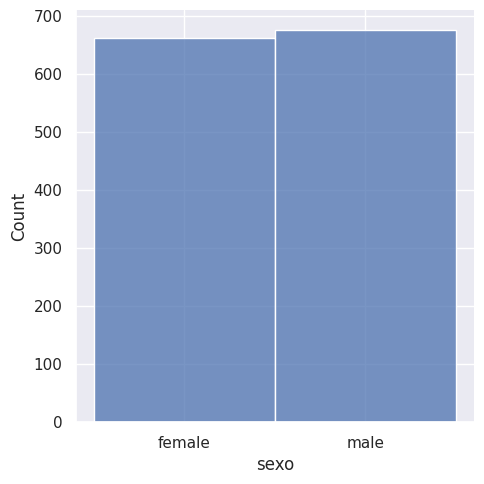

In [9]:
#Distribuição por sexo
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['sexo'])
plt.show()

<Figure size 600x600 with 0 Axes>

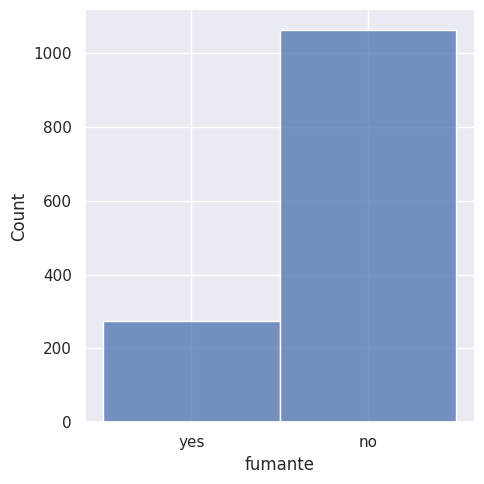

In [10]:
#Distribuição pela categoria fumante
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['fumante'])
plt.show()

<Figure size 600x600 with 0 Axes>

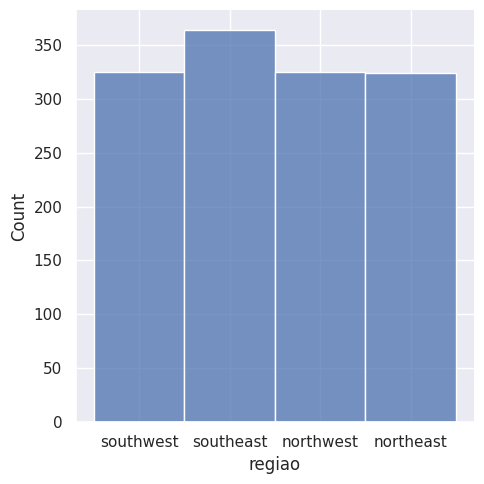

In [11]:
#Distribuição por regiao
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['regiao'])
plt.show()

<Figure size 600x600 with 0 Axes>

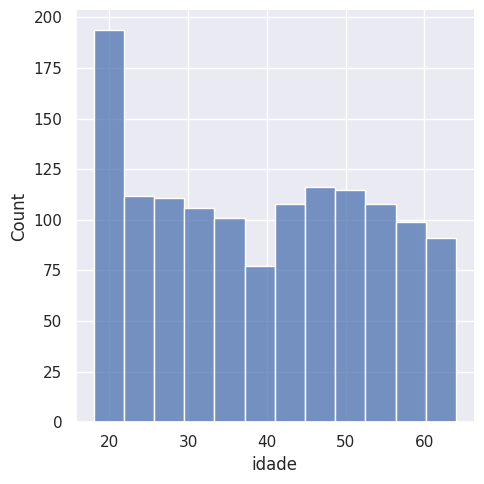

In [12]:
#Distribuição por idade
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['idade'])
plt.show()

## Analises

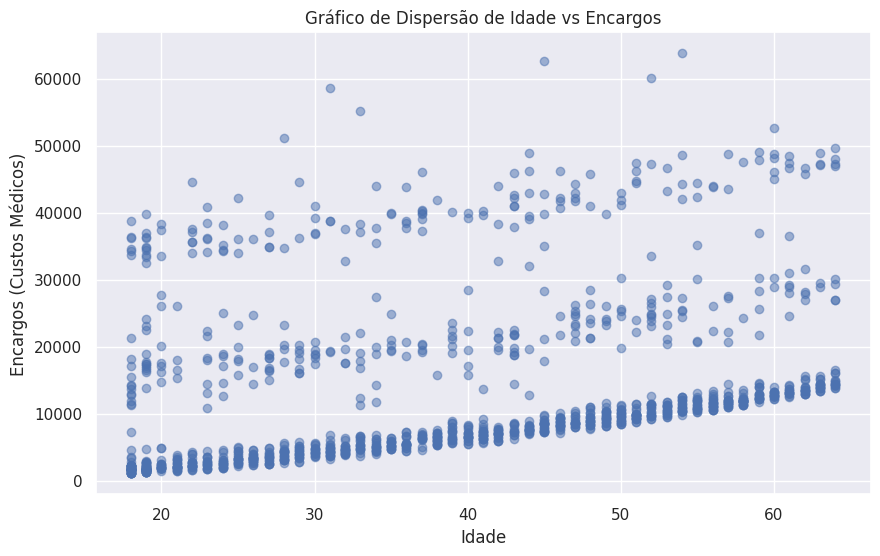

In [13]:
# Gráfico de Dispersão de Idade vs Encargos
plt.figure(figsize=(10, 6))
plt.scatter(df['idade'], df['encargos'], alpha=0.5)
plt.title('Gráfico de Dispersão de Idade vs Encargos')
plt.xlabel('Idade')
plt.ylabel('Encargos (Custos Médicos)')
plt.show()

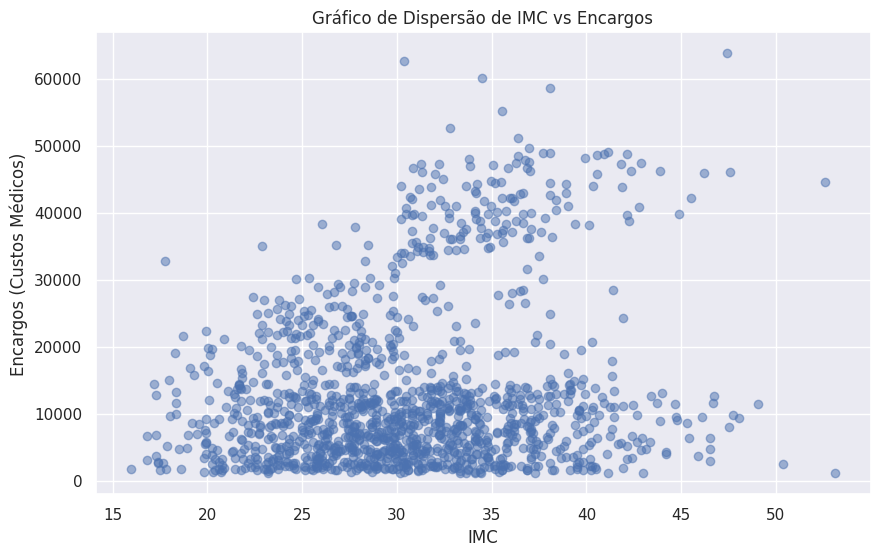

In [14]:
# Gráfico de Dispersão de IMC vs Encargos
plt.figure(figsize=(10, 6))
plt.scatter(df['imc'], df['encargos'], alpha=0.5)
plt.title('Gráfico de Dispersão de IMC vs Encargos')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.show()

<Axes: >

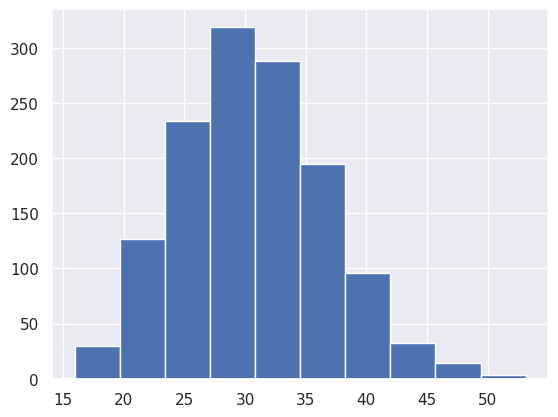

In [15]:
df["imc"].hist()

### Classificando IMC com fim de uma analise mais aprofundada

In [16]:
df["imc_cat"] = np.ceil(df["imc"] / 1.5) # ceil para arredondar valores para cima
df["imc_cat"].where(df["imc"] < 30, 4.0, inplace=True)

In [17]:
df["imc_cat"] = pd.cut(df["imc"],
                               bins=[15, 20, 25, 30, np.inf],
                               labels=[1, 2, 3, 4])

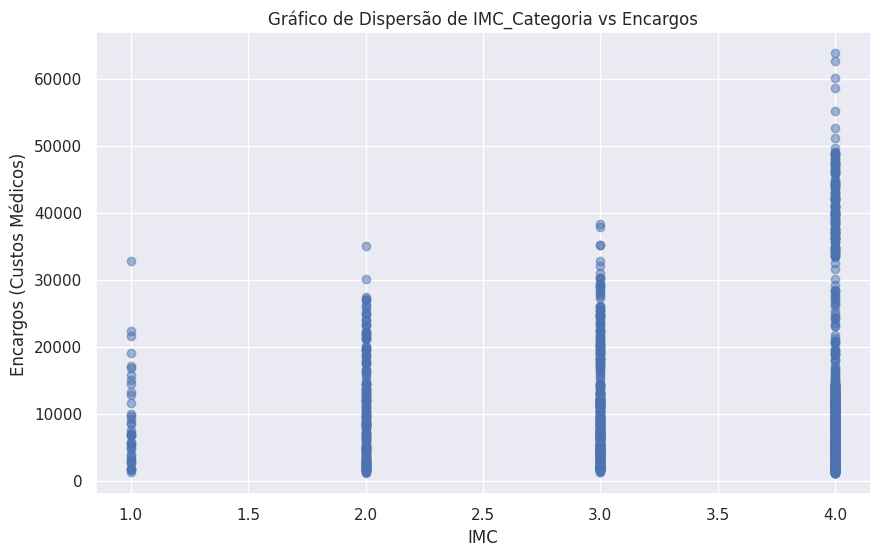

In [18]:
# Gráfico de Dispersão de Idade vs Encargos
plt.figure(figsize=(10, 6))
plt.scatter(df['imc_cat'], df['encargos'], alpha=0.5)
plt.title('Gráfico de Dispersão de IMC_Categoria vs Encargos')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.show()

<Figure size 1000x600 with 0 Axes>

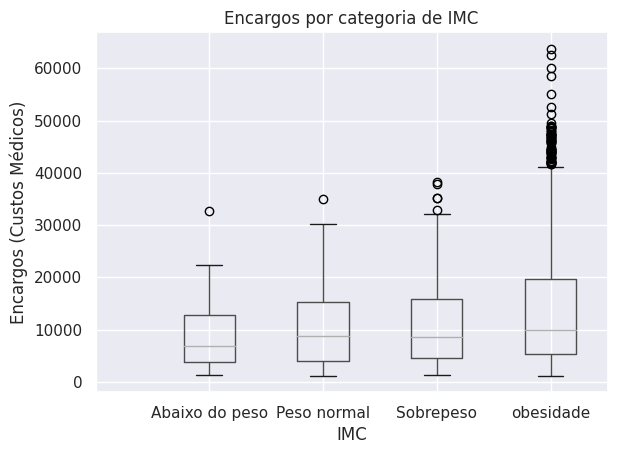

In [19]:
# Boxplot de Encargos por quantidade de filhos
plt.figure(figsize=(10, 6))
df.boxplot(column='encargos', by='imc_cat')
plt.title('Encargos por categoria de IMC')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.suptitle('')
# Substituindo as labels
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['', 'Abaixo do peso', 'Peso normal', 'Sobrepeso', 'obesidade'])
plt.show()

In [20]:
print('''
    A mediana dos custos médicos parece aumentar conforme o IMC aumenta,
    especialmente notável na categoria "obesidade", onde a mediana é maior em
    comparação com as outras categorias.
''')
# ------------------------------------------------------------------------------
print('''
    As categorias "Peso normal" e "Sobrepeso" têm uma dispersão similar,
    enquanto a categoria "obesidade" tem uma caixa um pouco maior, indicando
    uma maior variabilidade nos encargos médicos.

''')
# ------------------------------------------------------------------------------
print('''
    Existem vários outliers, especialmente na categoria "obesidade", o que
    sugere que alguns indivíduos com obesidade têm encargos médicos
    significativamente maiores que o restante.

''')

 
    A mediana dos custos médicos parece aumentar conforme o IMC aumenta, 
    especialmente notável na categoria "obesidade", onde a mediana é maior em 
    comparação com as outras categorias.

 
    As categorias "Peso normal" e "Sobrepeso" têm uma dispersão similar, 
    enquanto a categoria "obesidade" tem uma caixa um pouco maior, indicando
    uma maior variabilidade nos encargos médicos.


 
    Existem vários outliers, especialmente na categoria "obesidade", o que
    sugere que alguns indivíduos com obesidade têm encargos médicos
    significativamente maiores que o restante.




### Analise para fumantes

In [21]:
print('''
    A mediana dos custos médicos para fumantes ("yes") é significativamente mais
  alta em comparação com os não fumantes ("no"). Isso sugere que, em média,
  fumantes têm encargos médicos maiores.

''')
# ------------------------------------------------------------------------------
print('''
    - A caixa para os fumantes é muito maior do que para os não fumantes,
   indicando uma maior dispersão (variabilidade) nos custos médicos entre
  os fumantes.

    - A caixa dos não fumantes é mais compacta, sugerindo que a maioria dos não
   fumantes tem custos médicos relativamente mais baixos e menos variáveis.

''')
# ------------------------------------------------------------------------------
print('''
    - Para os não fumantes, há muitos outliers, sugerindo que embora a maioria
   tenha custos médicos baixos, alguns indivíduos não fumantes enfrentam custos
   médicos significativamente maiores.

    - Para os fumantes, não há muitos outliers visíveis, mas a distribuição
    em si já é mais ampla, indicando que os altos custos são comuns entre os
    fumantes.

''')

 
    A mediana dos custos médicos para fumantes ("yes") é significativamente mais
  alta em comparação com os não fumantes ("no"). Isso sugere que, em média, 
  fumantes têm encargos médicos maiores.
  

 
    - A caixa para os fumantes é muito maior do que para os não fumantes, 
   indicando uma maior dispersão (variabilidade) nos custos médicos entre
  os fumantes.
  
    - A caixa dos não fumantes é mais compacta, sugerindo que a maioria dos não
   fumantes tem custos médicos relativamente mais baixos e menos variáveis.


 
    - Para os não fumantes, há muitos outliers, sugerindo que embora a maioria
   tenha custos médicos baixos, alguns indivíduos não fumantes enfrentam custos
   médicos significativamente maiores.
   
    - Para os fumantes, não há muitos outliers visíveis, mas a distribuição
    em si já é mais ampla, indicando que os altos custos são comuns entre os
    fumantes.




<Figure size 1000x600 with 0 Axes>

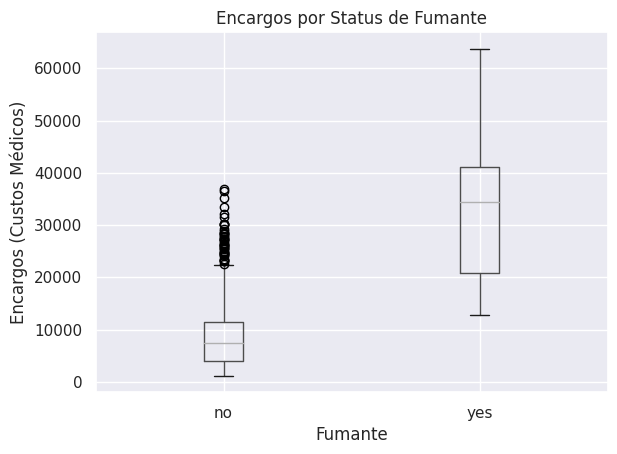

In [22]:
# Boxplot de Encargos por quantidade de filhos
plt.figure(figsize=(10, 6))
df.boxplot(column='encargos', by='fumante')
plt.title('Encargos por Status de Fumante')
plt.xlabel('Fumante')
plt.ylabel('Encargos (Custos Médicos)')
plt.suptitle('')
plt.show()

### Convertendo variáveis categoricas

In [23]:
#Converting Categorical Columns into Numerical Columns

df.replace({'sexo':{'female':0, 'male':1}}, inplace=True)

df.replace({'fumante':{'no':0, 'yes':1}}, inplace=True)

df.replace({'regiao':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

### Buscando correlações

In [24]:
corr_matrix = df.corr()

In [25]:
corr_matrix["encargos"].sort_values(ascending=False)

,encargos
encargos,1.000000
fumante,0.787251
idade,0.299008
imc,0.198341
imc_cat,0.186160
filhos,0.067998
sexo,0.057292
regiao,-0.056993


Text(0.5, 1.0, 'Mapa de calor de correlação triangular')

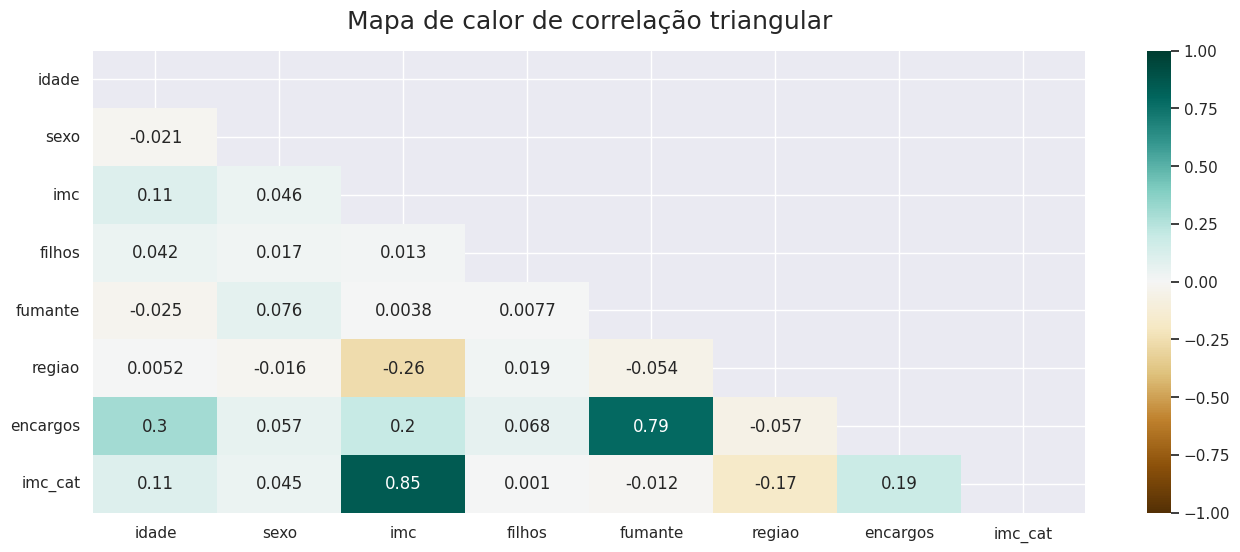

In [26]:
plt.figure(figsize=(16, 6))
# define a máscara para definir os valores no triângulo superior como True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlação triangular', fontdict={'fontsize':18}, pad=16)

In [28]:
print('''
1. Correlação entre fumante e encargos (0.79):

Alta Correlação Positiva: Há uma correlação positiva forte entre o status de
fumante e os encargos médicos, indicando que ser fumante está fortemente
associado a custos médicos mais elevados. Isso é consistente com o que foi
observado anteriormente no boxplot.''')
# ------------------------------------------------------------------------------
print('''
2. Correlação entre imc e encargos (0.2):

Correlação Moderada Positiva: Existe uma correlação moderada positiva entre o
IMC e os encargos médicos. Isso sugere que indivíduos com IMC mais alto tendem
a ter encargos médicos mais elevados, embora a correlação não seja tão forte
quanto a observada entre fumante e encargos.
''')
# ------------------------------------------------------------------------------
print('''
3. Correlação entre idade e encargos (0.3):

Correlação Moderada Positiva: A idade também tem uma correlação positiva
moderada com os encargos médicos. Isso sugere que, à medida que a idade aumenta,
os encargos médicos tendem a aumentar, possivelmente devido a problemas de
saúde relacionados à idade.
''')


1. Correlação entre fumante e encargos (0.79):

Alta Correlação Positiva: Há uma correlação positiva forte entre o status de
fumante e os encargos médicos, indicando que ser fumante está fortemente
associado a custos médicos mais elevados. Isso é consistente com o que foi
observado anteriormente no boxplot.

2. Correlação entre imc e encargos (0.2):

Correlação Moderada Positiva: Existe uma correlação moderada positiva entre o
IMC e os encargos médicos. Isso sugere que indivíduos com IMC mais alto tendem
a ter encargos médicos mais elevados, embora a correlação não seja tão forte
quanto a observada entre fumante e encargos.


3. Correlação entre idade e encargos (0.3):

Correlação Moderada Positiva: A idade também tem uma correlação positiva
moderada com os encargos médicos. Isso sugere que, à medida que a idade aumenta,
os encargos médicos tendem a aumentar, possivelmente devido a problemas de
saúde relacionados à idade.



## Separando em treino e teste

In [30]:
df_labels = df["encargos"].copy() #armazenando a target (nosso y)
df_train = df.drop("encargos", axis=1) # apagando a target para a base de treino (nosso x)

In [31]:
train_data, test_data, target_train, target_test = train_test_split(df_train, df_labels, test_size=0.2)

In [32]:
print(df_train.shape, train_data.shape, test_data.shape)

(1338, 7) (1070, 7) (268, 7)


In [33]:
print(df_labels.shape, target_train.shape, target_test.shape)

(1338,) (1070,) (268,)


## Criando Modelo

In [35]:
model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [36]:
# Treinando Modelo

model.fit(train_data, target_train)

RandomForestRegressor(max_depth=7)

## Teste

In [37]:
# Previsão de valores com base de teste
test_data_predictions = model.predict(test_data)

print("Predictions:", list(test_data_predictions[:5]))

Predictions: [15487.041426841353, 41913.74141686245, 16256.82200538103, 6849.223540005383, 5417.664799305294]


### Comparando com valores reais

In [38]:
print("Labels:", list(target_test[:5]))

Labels: [11396.9002, 39983.42595, 27941.28758, 6389.37785, 4149.736]


## Avaliação do modelo

In [39]:
# Avaliando o modelo

from sklearn.metrics import r2_score

In [40]:
r2_score(test_data_predictions, target_test)

0.8486938111508783